# Air France Reviews Dataset

In [264]:
## importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub

import warnings
warnings.filterwarnings('ignore')

In [265]:
air_france_reviews_dataset_path = kagglehub.dataset_download('saharnazyaghoobpoor/air-france-reviews-dataset')

In [266]:
## loading the data
reviews_data = pd.read_csv(
    "airfrance_tripadvisor_reviews.csv"
)

reviews_data.head()

,rating,title,text,publishedDate
0,1,WORST AIRLINE,I travel a lot - and I travel often. Last week...,2024-11-13
1,1,Terrible experience with Airfrance,"This review is regarding flight AF185, we book...",2024-11-13
2,1,Extremely Disappointing Experience with Air Fr...,I recently flew with Air France on flight #185...,2024-11-12
3,1,Horrible,Wow!!! What a horrible experience!! I've alway...,2024-11-11
4,1,The Worst Flight Experience I’ve Ever Had,I spent a fantastic 10-day vacation in Hong Ko...,2024-11-11


In [267]:
## renaming columns
reviews_data.rename(columns = {"publishedDate" : "date"}, inplace = True)
reviews_data.head()

,rating,title,text,date
0,1,WORST AIRLINE,I travel a lot - and I travel often. Last week...,2024-11-13
1,1,Terrible experience with Airfrance,"This review is regarding flight AF185, we book...",2024-11-13
2,1,Extremely Disappointing Experience with Air Fr...,I recently flew with Air France on flight #185...,2024-11-12
3,1,Horrible,Wow!!! What a horrible experience!! I've alway...,2024-11-11
4,1,The Worst Flight Experience I’ve Ever Had,I spent a fantastic 10-day vacation in Hong Ko...,2024-11-11


In [268]:
## ordering columns
reviews_data = reviews_data[['date', 'title', 'text', 'rating']]

In [269]:
## final view
reviews_data.head()

,date,title,text,rating
0,2024-11-13,WORST AIRLINE,I travel a lot - and I travel often. Last week...,1
1,2024-11-13,Terrible experience with Airfrance,"This review is regarding flight AF185, we book...",1
2,2024-11-12,Extremely Disappointing Experience with Air Fr...,I recently flew with Air France on flight #185...,1
3,2024-11-11,Horrible,Wow!!! What a horrible experience!! I've alway...,1
4,2024-11-11,The Worst Flight Experience I’ve Ever Had,I spent a fantastic 10-day vacation in Hong Ko...,1


In [270]:
## checking dtypes
reviews_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2560 entries, 0 to 2559
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    2560 non-null   object
 1   title   2560 non-null   object
 2   text    2560 non-null   object
 3   rating  2560 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 80.1+ KB


In [271]:
## changing datetime
reviews_data['date'] = pd.to_datetime(
    reviews_data['date']
)

In [272]:
## checking the dtypes
reviews_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2560 entries, 0 to 2559
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    2560 non-null   datetime64[ns]
 1   title   2560 non-null   object        
 2   text    2560 non-null   object        
 3   rating  2560 non-null   int64         
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 80.1+ KB


## EDA and Visualization

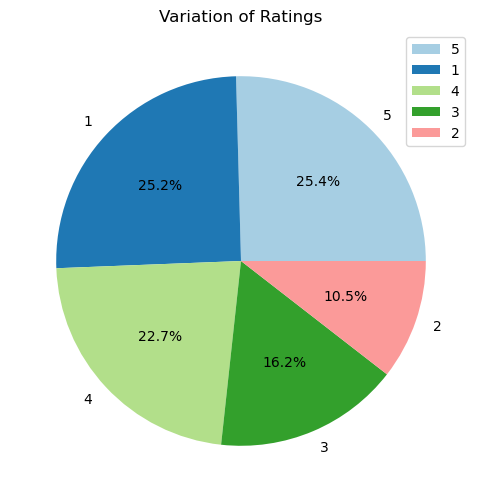

In [273]:
# Plotting the pie chart
reviews_data.rating.value_counts().plot(
    kind='pie',
    autopct='%1.1f%%',  # Display percentage
    colors=plt.cm.Paired.colors,  # Color palette
    title='Variation of Ratings',
    ylabel='',  # No label for the y-axis
    legend=True,  # Show legend
    figsize=(6, 6)  # Size of the plot
)

plt.ylabel('')  # Remove the ylabel to clean up the plot
plt.show()

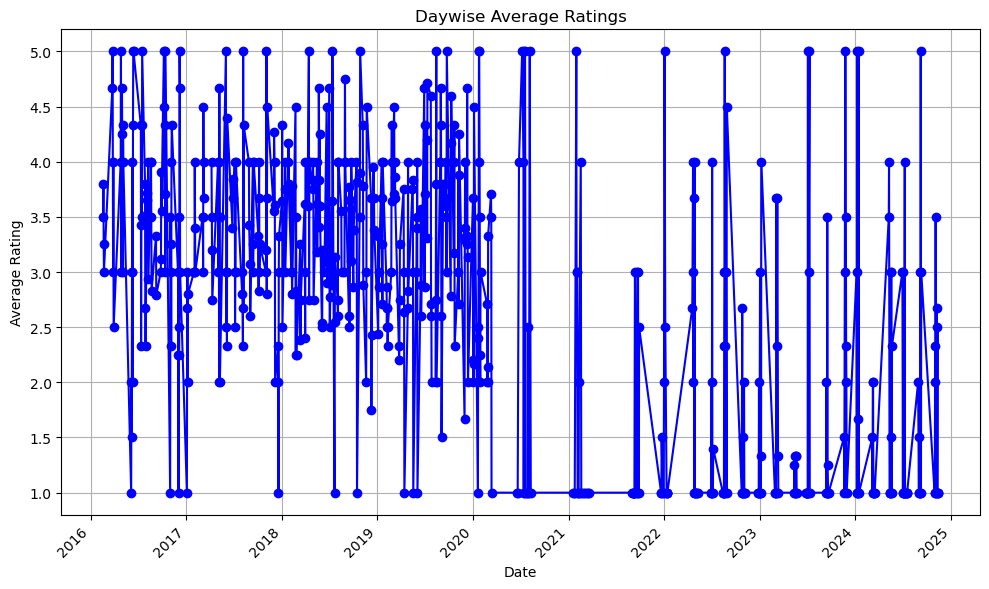

In [274]:
## visualizing the ratings daywise - Any Trend to Follow up

daywise_ratings = reviews_data.groupby(['date'])['rating'].mean().round(2)

# Plotting the trend of ratings over time
plt.figure(figsize=(10, 6))
daywise_ratings.plot(marker='o', linestyle='-', color='b', title='Daywise Average Ratings')
plt.xlabel('Date')
plt.ylabel('Average Rating')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Not Much appealing, so will be moving towards, `monthwise ratings`

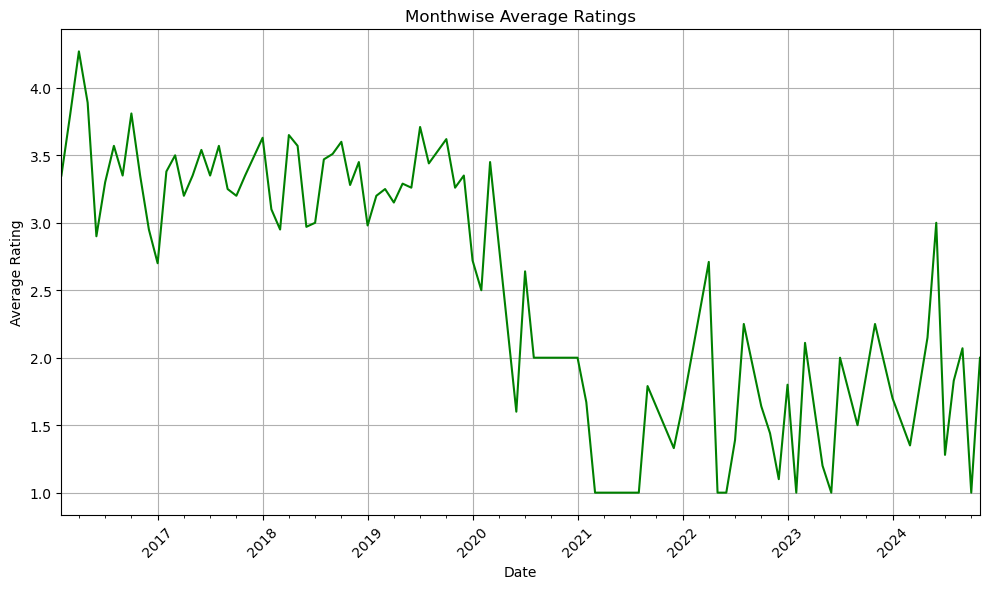

In [275]:
## visualizing the ratings Monthwise - Any Trend to Follow up

monthwise_ratings = reviews_data.groupby(reviews_data['date'].dt.to_period('M'))['rating'].mean().round(2)
# monthwise_ratings

# Plotting the trend of ratings over time
plt.figure(figsize=(10, 6))
monthwise_ratings.plot(linestyle='-', color='g', title='Monthwise Average Ratings')
plt.xlabel('Date')
plt.ylabel('Average Rating')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<p> -----
    Clearly visible that ratings have been down post pandemic
    -----
</p>

In [276]:
## yearly reviews count
yearly_reviews = reviews_data.groupby([reviews_data['date'].dt.to_period('A'), 'rating'])['date'].size().reset_index(name='count')

## yearly total reviews
yearly_total_reviews = yearly_reviews.groupby(['date'])['count'].sum().reset_index(name = 'total_reviews')

## merge total reviews back to the actual data
yearly_reviews = yearly_reviews.merge(yearly_total_reviews, on = 'date')

## percentage of reviews yearwise
yearly_reviews['review_pct'] = (100.0 * yearly_reviews['count']/yearly_reviews['total_reviews']).round(2)

# Pivot the table for a cleaner view (optional)
yearly_reviews_pivot = yearly_reviews.pivot(index='date', columns='rating', values='review_pct').fillna(0)

In [277]:
yearly_reviews_pivot

rating,1,2,3,4,5
date,,,,,
2016,13.00,11.50,17.25,31.50,26.75
2017,14.80,9.60,22.00,26.80,26.80
2018,16.47,11.91,17.65,25.59,28.38
2019,18.60,9.80,18.00,23.60,30.00
2020,35.00,15.00,14.00,14.00,22.00
2021,77.55,4.08,6.12,4.08,8.16
2022,74.26,4.95,3.96,5.94,10.89
2023,73.64,9.09,0.91,3.64,12.73
2024,70.83,10.83,3.33,1.67,13.33


<Figure size 1000x600 with 0 Axes>

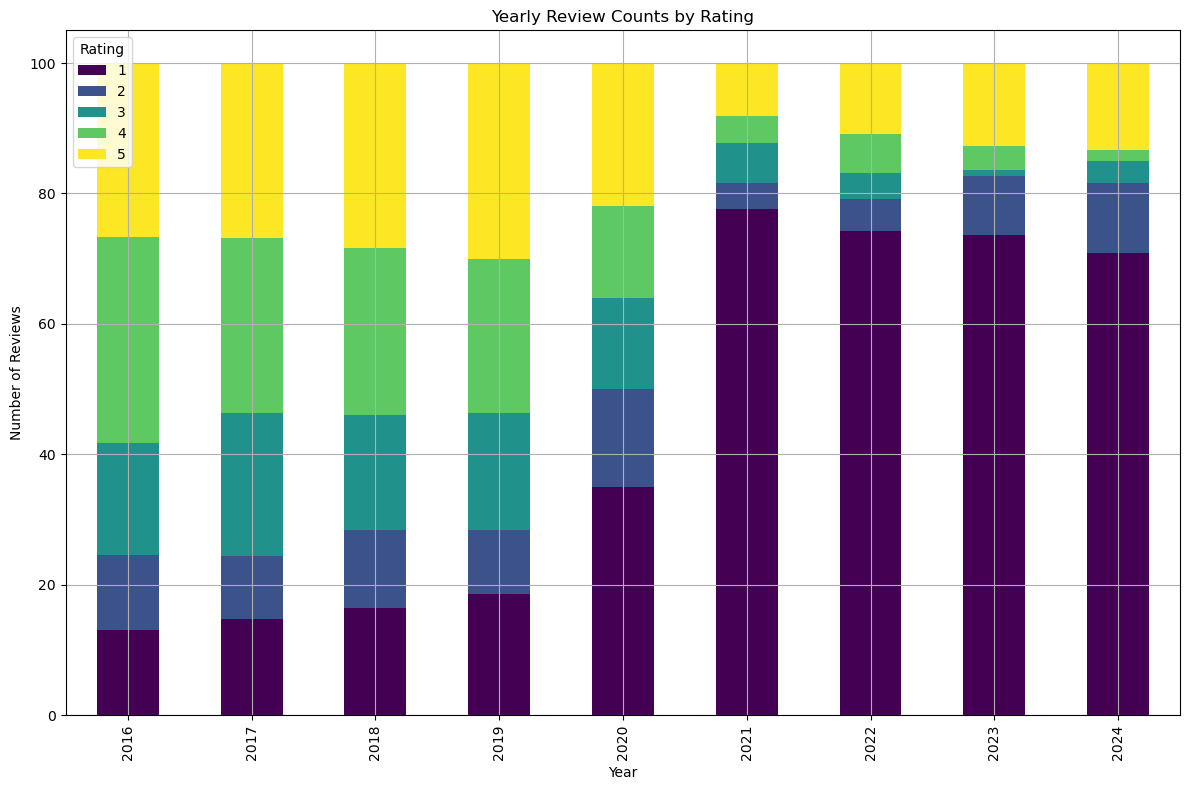

In [278]:
# Plotting yearly reviews count (optional)
plt.figure(figsize=(10, 6))
yearly_reviews_pivot.plot(kind='bar', stacked=True, colormap='viridis', figsize=(12, 8), title='Yearly Review Counts by Rating')
plt.xlabel('Year')
plt.ylabel('Number of Reviews')
plt.legend(title='Rating')
plt.grid(True)
plt.tight_layout()
plt.show()

In [279]:
reviews_data.sample(10)

,date,title,text,rating
945,2019-01-20,How to JACK passengers!,"From LAX to Paris, CDG Airport: Flight was bum...",1
1156,2018-09-21,Great flight from Denver to Paris,"We were super impressed with Air France, the f...",5
1656,2018-01-01,Not what we expected,The flight from Manchester to Charles de Gaull...,3
534,2019-12-01,Air France — Superior to Alitalia,On the day we were traveling in late November ...,5
441,2020-01-29,"Good onboard entertainment, good punctuality; ...",To say that France is meant to be the culinary...,2
269,2022-08-22,Will lose your luggage and never contact you a...,I took many flights on my summer trip in Europ...,1
515,2019-12-09,Good service,Very good crew. Attentive discret\r\nThe meal ...,5
2538,2016-03-24,"Air France-great, CDG airport what a nice surp...",Ticketing and baggage was quick and efficient ...,5
310,2022-04-25,Nightmarish experience at Sky Priority Check i...,"Today, I learnt my French grand ma was dying. ...",2
2304,2016-08-09,Late Arriving / Late Leaving,We just took a non stop flight to Paris for va...,3


## 1. Time Period Segmentation

*Divide the data into meaningful periods*
  1. #### Pre-pandemic (2016-2018)
  2. #### Pandemic (2019-2020)
  3. #### Post-pandemic (2021-2024)

In [280]:
## creating segments of the reviews

prepandemic_df = reviews_data[reviews_data['date'] <= '2018-12-31']
pandemic_df = reviews_data[(reviews_data['date'] > '2018-12-31') & (reviews_data['date'] <= '2020-12-31')]
postpandemic_df = reviews_data[reviews_data['date'] > '2020-12-31']

prepandemic_df.date.max(), prepandemic_df.date.min(), pandemic_df.date.max(), pandemic_df.date.min(), postpandemic_df.date.max(), postpandemic_df.date.min()

(Timestamp('2018-12-20 00:00:00'),
 Timestamp('2016-02-18 00:00:00'),
 Timestamp('2020-08-09 00:00:00'),
 Timestamp('2019-01-04 00:00:00'),
 Timestamp('2024-11-13 00:00:00'),
 Timestamp('2021-01-19 00:00:00'))

## 2. Sentiment Analysis

### Classify Reviews: Use text analysis to classify reviews as positive, neutral, or negative based on the rating:
   1. *Ratings 4-5*: **Positive**
   2. *Ratings 3*: **Neutral**
   3. *Ratings 1-2*: **Negative**

In [281]:
## function to map the reviews to the segments
def segment_ratings(df):
    if df['rating'] <= 2:
        return 'Negative'
    elif df['rating'] == 3:
        return 'Neutral'
    else:
        return 'Positive'

In [282]:
## applying the function to all the segments
prepandemic_df.loc[:, 'rating_segment'] = prepandemic_df.apply(segment_ratings, axis = 1)
pandemic_df.loc[:, 'rating_segment'] = pandemic_df.apply(segment_ratings, axis = 1)
postpandemic_df.loc[:, 'rating_segment'] = postpandemic_df.apply(segment_ratings, axis = 1)

In [283]:
## checking the data
# prepandemic_df.sample(10)
# pandemic_df.sample(10)
# postpandemic_df.sample(10)

### Extract Key Topics:
    Using Natural Language Processing (NLP)

In [284]:
import re
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Download NLTK stopwords
nltk.download('stopwords')

# Function to preprocess text
def preprocess_text(text):
    # Remove punctuation and numbers
    text = re.sub(r'\W+', ' ', text)
    text = re.sub(r'\d+', '', text)
    # Convert to lowercase
    text = text.lower()
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    stop_words.update(['air', 'france']) ## adding custom stopwords
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

# Function to extract topics
def extract_topics(df, n_topics=15, n_top_words=15):
    # Preprocess the text data
    df['clean_text'] = (df['title'] + ' ' + df['text']).apply(preprocess_text)
    
    # Fit the count vectorizer with bigrams
    count_vectorizer = CountVectorizer(stop_words='english', ngram_range=(3, 3), max_df=0.95)
    count_data = count_vectorizer.fit_transform(df['clean_text'])
    
    # Fit the LDA model
    lda = LatentDirichletAllocation(n_components=n_topics, random_state=0)
    lda.fit(count_data)
    
    # Get the topics
    topics = {}
    for i, topic in enumerate(lda.components_):
        topics[f'Topic {i}'] = [count_vectorizer.get_feature_names_out()[index] for index in topic.argsort()[:-n_top_words - 1:-1]]
    
    return pd.DataFrame(topics)
    
    

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\saiba\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [285]:
## extracting topics for all ratings segments for all the segments [Prepandemic]
prepandemic_neg_topics = extract_topics(prepandemic_df[prepandemic_df['rating_segment'] == 'Negative'])
prepandemic_neu_topics = extract_topics(prepandemic_df[prepandemic_df['rating_segment'] == 'Neutral'])
prepandemic_pos_topics = extract_topics(prepandemic_df[prepandemic_df['rating_segment'] == 'Positive'])

In [286]:
## looking into the topics
prepandemic_neg_topics

,Topic 0,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,Topic 7,Topic 8,Topic 9,Topic 10,Topic 11,Topic 12,Topic 13,Topic 14
0,flight code share,attendants ugly unhelpful,food flight attendants,oh madame asked,horrible customer service,business class seats,service good food,charles gaulle airport,poor service flight,service desk number,extra leg room,ground staff bologna,poor customer service,flight fully booked,flight delayed hours
1,people came forth,ugly unhelpful attitude,premium economy seats,connecting flight paris,canceled direct flight,worst customer service,received email saying,gate catch bus,flight cph cdg,luggage going make,soy bean salad,home hours later,end runway ppt,code share partners,business class experience
2,travelling washington dc,flight attendants ugly,opted premium economy,charles gaulle airport,premium economy seats,submitted airline days,begin cruise luggage,snr vice president,wife parents law,family got email,business class af,told make line,received luggage days,connecting flight paris,felt like economy
3,minutes minute flight,upgrade premium economy,hours glass water,seat exit row,luggage got lost,airline days received,cruise luggage delivered,delayed hours causing,kid wife parents,disturb cabin crew,business class passengers,hr later arrived,service booked flight,premium economy seat,late leaving arriving
4,code share flybe,economy business class,worst customer service,gate oh madame,paris new york,booked internal flight,line customer service,extremely poor services,extra leg room,crew private talks,leg room seats,paris hours flight,customer service booked,stroller got plane,flight hours took
5,terrible customer service,flight cancelled flight,days leave paris,allow catch flight,flight months ago,days received baggage,flight paris amsterdam,terrible customer service,left hours late,cabin crew private,reason flight cancelled,long haul flight,flight paris sfo,hours flight cancellation,worst flight attendants
6,flight connecting flight,premium economy entertainment,flat business class,crete oh madame,flight took hours,baggage submitted airline,follow progress luggage,business class seats,level customer service,business class service,worst experience life,charles gaulle airport,paris charles gaulle,paris business class,connecting flight paris
7,flight cancelled flight,make matters worse,seats incredibly uncomfortable,purchased travel agency,flight got delayed,trip south africa,food business class,delayed late arrival,seats different rows,missed connecting flight,business class seat,choice soft drinks,terrible customer service,late ca hrs,long haul flight
8,leaves lot desired,paris minutes late,hour flight flight,klm com purchased,arrived hours later,flight sao paulo,flight low cost,low cost airlines,bad experience traveling,flight took hours,business class seats,worst airline traveled,booked flight delta,inside recommend occasion,absolutely ruined trip
9,flying blue member,bought tickets months,travelling business class,impossible change klm,worth price flew,battery allowed board,missed connecting flight,airport customer service,family year old,lay charles gaulle,uncomfortable flight seats,charles gaulle nightmare,premium economy overbooked,ca hrs late,half cup coffee


In [287]:
## looking into Neutral Topics
prepandemic_neu_topics

,Topic 0,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,Topic 7,Topic 8,Topic 9,Topic 10,Topic 11,Topic 12,Topic 13,Topic 14
0,non stop flight,paid business class,printing boarding passes,avoid charles degaulle,french stole christmas,flight kiev paris,stand allow pass,long haul flights,refund hour rule,business class seats,premium economy seat,expensive business class,flight tel aviv,ice cream provided,ordered vegetarian meal
1,good service hard,contact customer service,baggage control officers,charles degaulle airport,christmas sicily french,charles gaulle paris,seat premium economy,fly premium economy,old business class,pre select seats,flight hrs mins,inflight service ok,flight cdg lisbon,paris mumbai return,plane late leaving
2,outbound flight tahiti,fly stand checked,food good seats,traveling business class,sicily french stole,airlines overall service,cabin crew good,long haul business,business class seats,early bag missed,charles gaulle airport,flight athens paris,luggage left paris,cream provided flights,late leaving time
3,day hotel moorea,told fly stand,seat food average,flight entertainment ok,pm instead pm,normally fly singapore,premium economy really,fly long haul,flight atlanta paris,bag missed connection,arrived days later,usually enjoy flying,terminal bus transferring,atlantic premium economy,long haul flight
4,flight hours later,charles degaulle airport,good flight time,crew cherry crew,dec leave iah,service nice efficient,flying business class,haul business class,screens flight entertainment,short haul flight,welcoming dare say,premium economy uncomfortable,paris short flight,virgin atlantic premium,disappointing business class
5,loose day hotel,service quite good,flew business class,refused kid toilet,leave iah dec,flight attendants nice,business class really,early morning flight,missed connection flight,long haul flights,untidy certainly near,possibly missing flight,try premium economy,cabin crew went,business class flight
6,flight tahiti nui,good premium economy,flight left time,tickets overpriced cleanliness,flight leaving pm,flight entertainment seats,restroom needed request,business class seat,leg room really,selection films food,good night sleep,premium economy section,arrive minutes late,crew went strike,premium economy ticket
7,year old stroller,connecting flight paris,business class seats,mention satisfying value,terminal came terminal,flight san francisco,went respectfully going,premium economy disappointing,long time board,business class cabin,got good night,class premium economy,flight left time,economy seat recline,arrived minutes early
8,paid months advance,make feel special,second time flying,member friendly neighbour,flew business class,flying business class,class billed approximately,make matters worse,fast train paris,af food service,rest maybe notorious,business class flights,economy class seats,premium economy seat,passenger plane leave
9,service hard say,flight attendants nice,flight time seat,crew member friendly,charles gaulle airport,paris charles gaulle,expectation plus point,missed connecting flight,purchases hours funny,takes upper deck,days business class,face possibly missing,business class passengers,missed connecting flight,bordeaux disappointed fly


In [288]:
## looking into Positive Topics
prepandemic_pos_topics

,Topic 0,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,Topic 7,Topic 8,Topic 9,Topic 10,Topic 11,Topic 12,Topic 13,Topic 14
0,good flight good,cabin crew service,time great service,flight attendants friendly,good food good,new business class,flight attendants friendly,flight good flight,premium economy worth,premium economy worth,food beverage service,business class experience,flight entertainment good,premium economy worth,long haul flight
1,good value money,premium economy seats,service food good,attendants friendly helpful,time cabin crew,service food excellent,attendants friendly helpful,flight attendants helpful,short distance flight,good service great,pleasantly surprised quality,excellent business class,business class passengers,good food good,good flight good
2,flight good flight,upgrade business class,premium economy business,food pretty good,good service food,service excellent food,af business class,premium economy seats,best business class,good service good,surprised quality service,service good food,leg room seats,best airline flown,good food good
3,business class seats,paris new york,make sure flying,food good flight,staff friendly helpful,food good service,extremely polite courteous,minutes ahead schedule,quality premium economy,food good service,standard long haul,business class seat,room seats comfortable,paris charles gaulle,business class service
4,leg room great,premium economy comfortable,good service good,staff good food,business class experience,paris san francisco,service great food,flight crew pleasant,economy felt like,flight smooth flight,helpful food good,good food friendly,china eastern flight,economy worth extra,premium economy class
5,buenos aires paris,short haul flight,flight went smoothly,friendly flight attendants,food good wine,excellent flight entertainment,business class cabin,called airport information,booked flight paris,flight attendants attentive,business class flight,good business class,eastern flight leaving,seats upper deck,overall good experience
6,old school charm,service flight attendants,food good service,flight attendants efficient,good economy class,long time planned,nd passport check,flight service good,flight paris delta,economy worth extra,efficient service flight,food good service,flight leaving morning,movies television shows,service good flight
7,paris round trip,great flight paris,service great staff,way fly japan,ticket brokerage companies,skies paris french,group flight attendants,great food great,gluten free food,purchase extra luggage,excellent service flight,good staff friendly,endorsed china eastern,lay flat seats,good food drinks
8,service fly frequently,double decker plane,good premium economy,strange fruit purée,flight crew great,paris french style,food really quite,comfortable comfortable flight,service flight crew,great price paid,staff good service,flying business class,extra emergency exit,flight return ticket,best airline travelled
9,based airlines good,business class flight,economy business class,departure time arrival,best class experience,port harcourt nigeria,seat completely flat,plenty leg room,friendly flight attendants,cost premium economy,business class comfortable,business class way,business class ticket,good flight return,really appreciate service


In [289]:
## plotting wordclouds for all the segments
from wordcloud import WordCloud

# Function to plot word clouds
def plot_wordclouds(df, title):
    # Initialize the word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df))
    
    # Plot the word cloud
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title, size = 12)
    plt.show()

In [290]:
# prepandemic_neg_topics.T.apply(lambda x: plot_wordclouds(x, 'Prepandemic Negative Topics'), axis=1)

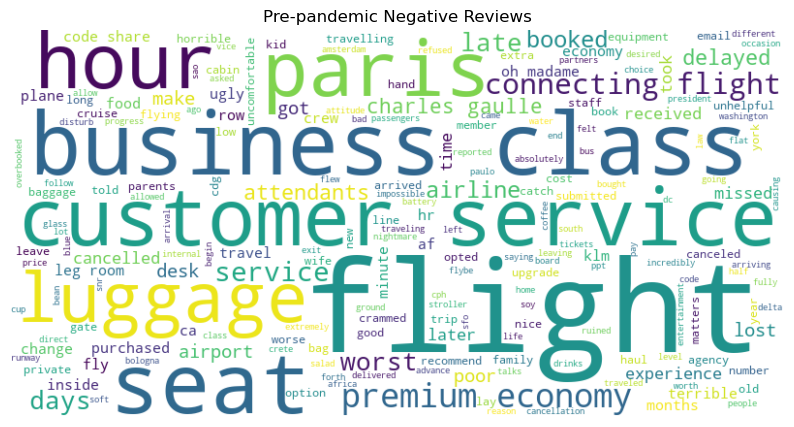

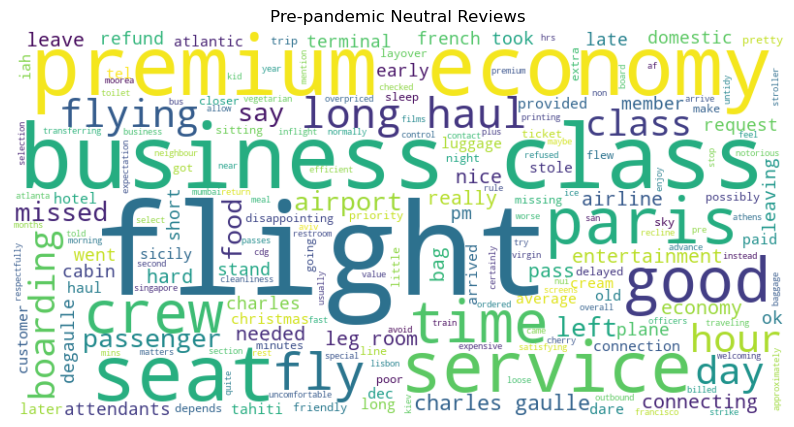

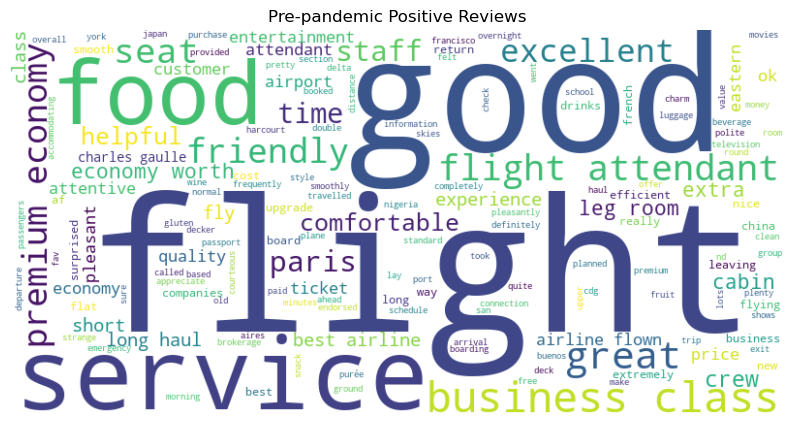

In [291]:
## plotting wordclouds for all the segments
plot_wordclouds(prepandemic_neg_topics.values.flatten(), 'Pre-pandemic Negative Reviews')
plot_wordclouds(prepandemic_neu_topics.values.flatten(), 'Pre-pandemic Neutral Reviews')
plot_wordclouds(prepandemic_pos_topics.values.flatten(), 'Pre-pandemic Positive Reviews')

In [292]:
## extracting topics for all ratings segments for all the segments [Pandemic]
pandemic_neg_topics = extract_topics(pandemic_df[pandemic_df['rating_segment'] == 'Negative'])
pandemic_neu_topics = extract_topics(pandemic_df[pandemic_df['rating_segment'] == 'Neutral'])
pandemic_pos_topics = extract_topics(pandemic_df[pandemic_df['rating_segment'] == 'Positive'])

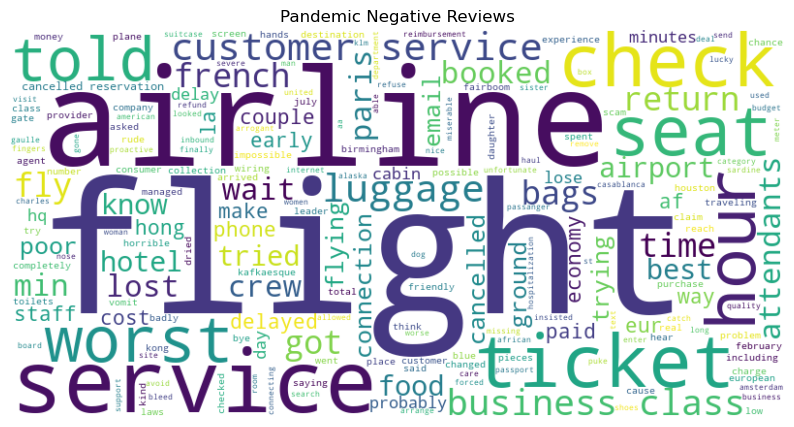

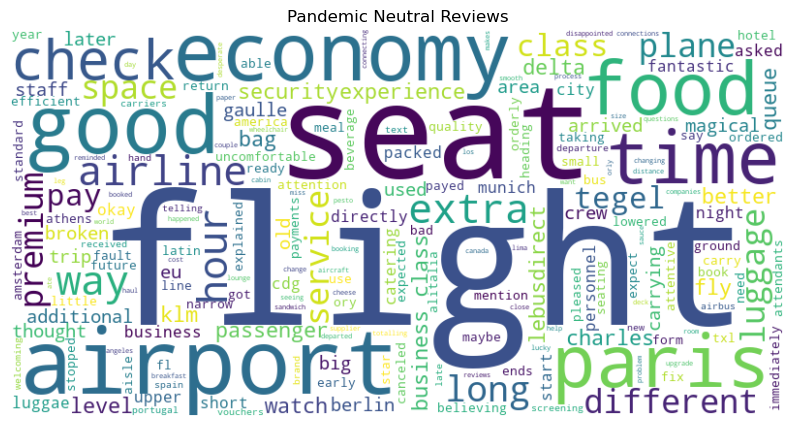

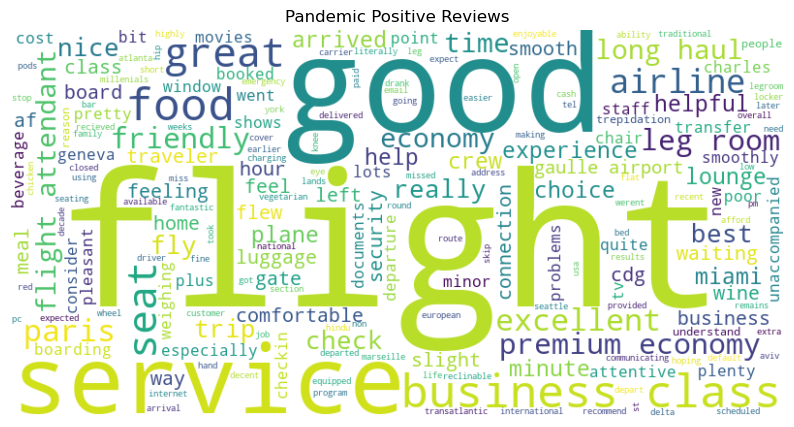

In [293]:
## plotting wordclouds for all the segments
plot_wordclouds(pandemic_neg_topics.values.flatten(), 'Pandemic Negative Reviews')
plot_wordclouds(pandemic_neu_topics.values.flatten(), 'Pandemic Neutral Reviews')
plot_wordclouds(pandemic_pos_topics.values.flatten(), 'Pandemic Positive Reviews')

In [294]:
## extracting topics for all ratings segments for all the segments [Postpandemic]
postpandemic_neg_topics = extract_topics(postpandemic_df[postpandemic_df['rating_segment'] == 'Negative'])
postpandemic_neu_topics = extract_topics(postpandemic_df[postpandemic_df['rating_segment'] == 'Neutral'])
postpandemic_pos_topics = extract_topics(postpandemic_df[postpandemic_df['rating_segment'] == 'Positive'])

In [295]:
# # Concatenate the dataframes for negative, neutral, and positive topics
# postpandemic_all_topics = pd.concat([postpandemic_neg_topics, postpandemic_neu_topics, postpandemic_pos_topics])

# # Count the occurrences of each topic
# topic_counts = postpandemic_all_topics.apply(pd.Series.value_counts).fillna(0).sum(axis=1).sort_values(ascending=False)

# # Display the topic counts
# topic_counts.head()

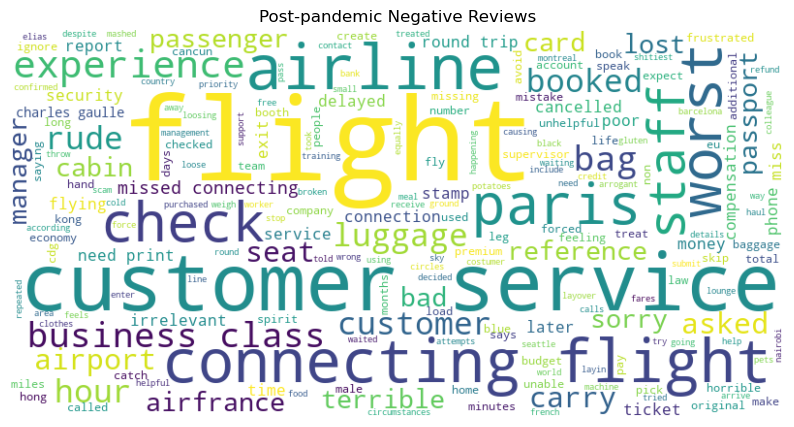

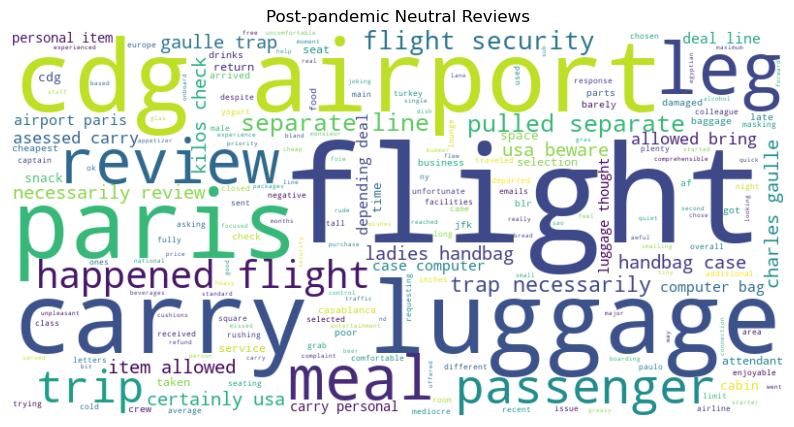

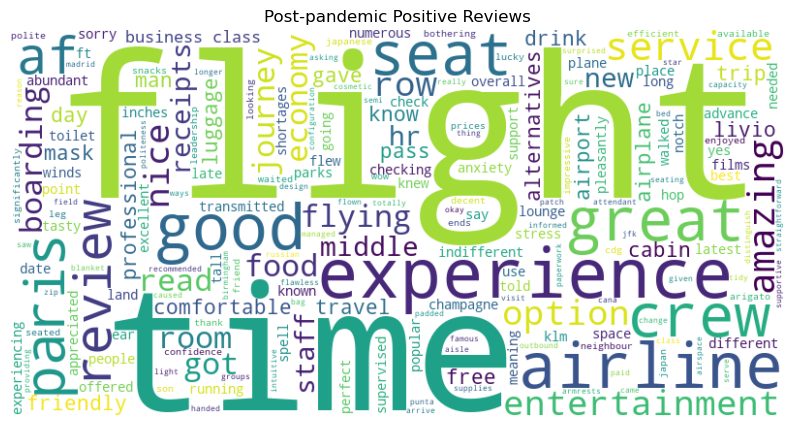

In [296]:
## plotting wordclouds for all the segments
plot_wordclouds(postpandemic_neg_topics.values.flatten(), 'Post-pandemic Negative Reviews')
plot_wordclouds(postpandemic_neu_topics.values.flatten(), 'Post-pandemic Neutral Reviews')
plot_wordclouds(postpandemic_pos_topics.values.flatten(), 'Post-pandemic Positive Reviews')

## 3. Comparative Analysis

### Track Changes Over Time:
 1. For each negative topic from the initial period, check if it persists in later periods.
 2. Identify new issues or improvements that appeared in later periods.

### Evaluate Responses to Feedback:
 1. Check if the company addressed any major concerns highlighted in earlier reviews.
 2. Look for shifts in sentiment and new areas of satisfaction or dissatisfaction.

In [297]:
## Track Changes Over Time
## function to track changes over time

def track_changes_over_time(df, segment):
    # Group by date and rating
    datewise_ratings = df.groupby([df['date'].dt.to_period('M'), 'rating_segment'])['rating'].count().unstack().fillna(0)
    
    # Calculate the percentage of each rating
    datewise_ratings['Total'] = datewise_ratings.sum(axis=1)
    datewise_ratings['Negative'] = (datewise_ratings['Negative'] / datewise_ratings['Total'] * 100).round(2)
    datewise_ratings['Neutral'] = (datewise_ratings['Neutral'] / datewise_ratings['Total'] * 100).round(2)
    datewise_ratings['Positive'] = (datewise_ratings['Positive'] / datewise_ratings['Total'] * 100).round(2)
    
    # Plot the changes
    plt.figure(figsize=(10, 6))
    datewise_ratings[['Negative', 'Neutral', 'Positive']].plot(kind='line', title=f'{segment} Reviews Over Time')
    plt.xlabel('Date')
    plt.ylabel('Percentage')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

<Figure size 1000x600 with 0 Axes>

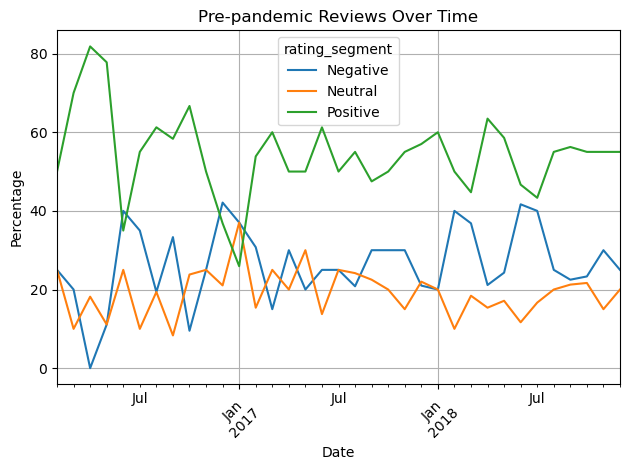

In [298]:
## tracking changes over time for all the segments
track_changes_over_time(prepandemic_df, 'Pre-pandemic')

<Figure size 1000x600 with 0 Axes>

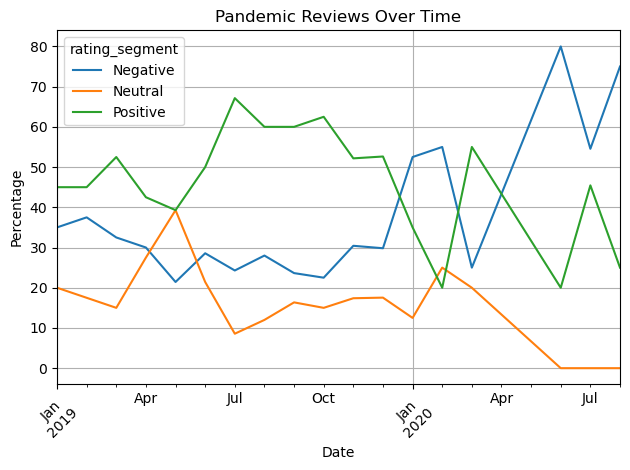

In [299]:
track_changes_over_time(pandemic_df, 'Pandemic')

<Figure size 1000x600 with 0 Axes>

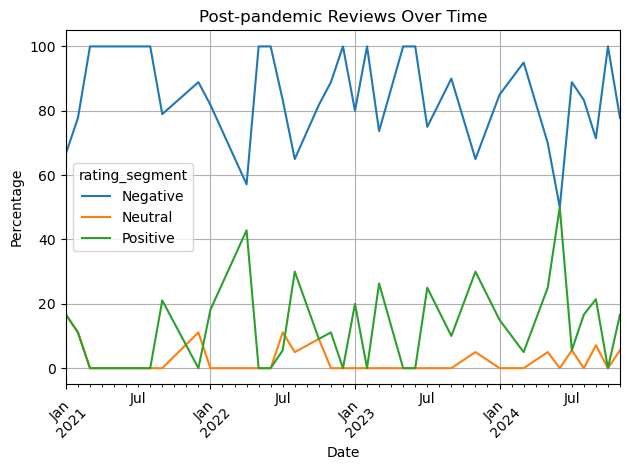

In [300]:
track_changes_over_time(postpandemic_df, 'Post-pandemic')

## 4. Using `LLM`s to Summarize Documents

In [301]:
## importing necessary libraries
from transformers import pipeline

summarizer = pipeline("summarization", model="Falconsai/text_summarization")

config.json:   0%|          | 0.00/1.49k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/242M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/2.32k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.42M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/2.20k [00:00<?, ?B/s]

### 1. Prepandemic Reviews Summary

In [319]:
## preparing the data for summarization

## combine all the topics in a single string
prepandemic_neg_topics_str = ' '.join(prepandemic_df[prepandemic_df['rating_segment'] == 'Negative']['title'])

## summarize the topics

# Custom prompt for summarization
# custom_prompt = (
#     "Summarize the following reviews into key categories:\n\n"
#     "- **Main Complaints:**\n"
#     "- **Positive Feedback:**\n"
#     "- **Suggestions for Improvement:**\n\n"
#     "Reviews:\n" + prepandemic_neg_topics_str
# )

# Custom prompt for extracting main concerning points
custom_prompt = (
    "Extract the main concerning points from the following user reviews. "
    "Focus only on the critical issues and complaints raised by the users:\n\n"
    "Reviews:\n" + prepandemic_neg_topics_str
)

# Generate summary with custom prompt
summary = summarizer(custom_prompt, max_length=500, min_length=50, do_sample=False)

# Print the summarized concerning points
print("Negative Reviews Summary: \n\n")
print(summary[0]['summary_text'])


Negative Reviews Summary: 


Air France is the worst airline in the whole world . Air France was a disappointment if you book connecting flights . AF 1617 today at 8.55AM The worst customer service I have ever had - Never again Air France - It is just not worth it . The worst airline on the world - AF CAN'T EVEN DELIVER A LUGGAGE .


In [330]:
## preparing the data for summarization

## combine all the topics in a single string
prepandemic_pos_topics_str = ' '.join(prepandemic_df[prepandemic_df['rating_segment'] == 'Positive']['title'])

## summarize the topics

# Custom prompt for extracting main concerning points
custom_prompt = (
    "Extract the main appreciating points from the following user reviews. "
    "Focus only on the users' appreciation, combining similar terms where applicable, and avoid redundancy. "
    "The summary should contain unique and concise positive points without repeating words or phrases unnecessarily.\n\n"
    "Reviews:\n" + prepandemic_pos_topics_str
)

# Generate summary with custom prompt
summary = summarizer(custom_prompt, max_length=150, min_length=50, do_sample=False)

# Print the summarized concerning points
print("Positive Reviews Summary: \n\n")
print(summary[0]['summary_text'])


Positive Reviews Summary: 


Air France is the way to fly with Air France! Great service, good service and good food . Great service and excellent service Great service . Good service, excellent service, great food, good food and good service Great flight . Very nice service, nice staff, great service and great food. Good flight - great service - Great service. Good Service - Good service. Excellent service, Good service & good service. Great flight from Paris to Paris Excellent service. Very good service, Great service! Excellent service Excellent service ... Great service


### 2. Pandemic Summary Review

In [331]:
## preparing the data for summarization

## combine all the topics in a single string
pandemic_neg_topics_str = ' '.join(pandemic_df[pandemic_df['rating_segment'] == 'Negative']['title'])

## summarize the topics

# Custom prompt for extracting main concerning points
custom_prompt = (
    "Extract the main concerning points from the following user reviews. "
    "Focus only on the critical issues and complaints raised by the users:\n\n"
    "Reviews:\n" + pandemic_neg_topics_str
)

# Generate summary with custom prompt
summary = summarizer(custom_prompt, max_length=500, min_length=50, do_sample=False)

# Print the summarized concerning points
print("Negative Reviews Summary: \n\n")
print(summary[0]['summary_text'])


Negative Reviews Summary: 


Air France withholding my money 4+ months after they cancelled my flight SCAM AIRLINE - No reimbursement yet for a cancelled flight in April! Probably the worst airline in terms of customer service (and I am French) Embarrassingly Poor in Flight Service Unfriendly, cramped seats, separating families Do not book with Air France Air France airport staff were not helpful . Abandoned at Charles De Gaulle Lost Baggage and Nobody taking Responsibility Big disapointment Mrs Terrible, frustrating


In [332]:
## preparing the data for summarization

## combine all the topics in a single string
pandemic_pos_topics_str = ' '.join(pandemic_df[pandemic_df['rating_segment'] == 'Positive']['title'])

## summarize the topics

# Custom prompt for extracting main concerning points
custom_prompt = (
    "Extract the main appreciating points from the following user reviews. "
    "Focus only on the users' appreciation, combining similar terms where applicable, and avoid redundancy. "
    "The summary should contain unique and concise positive points without repeating words or phrases unnecessarily.\n\n"
    "Reviews:\n" + pandemic_pos_topics_str
)

# Generate summary with custom prompt
summary = summarizer(custom_prompt, max_length=150, min_length=50, do_sample=False)

# Print the summarized concerning points
print("Positive Reviews Summary: \n\n")
print(summary[0]['summary_text'])


Positive Reviews Summary: 


Air France is a great flight from Sao Paulo to Bangalore on August 1, 2020 Much Better than BA, by miles Excellent Service So Helpful and efficient! A good flight I will repeat anytime to anywhere Good services Staff made the flight enjoyable Ms Usually very good experience Air Frane nice experience above the clouds Portland to Delhi Trip How it should be Basic economy on a380-800 Great flight as always My New Favorite Airline Great service and service . Great service Great service, but never miss a leg in your booked itinerary Great


### 3. PostPandemic Summary Review

In [333]:
## preparing the data for summarization

## combine all the topics in a single string
postpandemic_neg_topics_str = ' '.join(postpandemic_df[postpandemic_df['rating_segment'] == 'Negative']['title'])

## summarize the topics

# Custom prompt for extracting main concerning points
custom_prompt = (
    "Extract the main concerning points from the following user reviews. "
    "Focus only on the critical issues and complaints raised by the users:\n\n"
    "Reviews:\n" + postpandemic_neg_topics_str
)

# Generate summary with custom prompt
summary = summarizer(custom_prompt, max_length=500, min_length=50, do_sample=False)

# Print the summarized concerning points
print("Negative Reviews Summary: \n\n")
print(summary[0]['summary_text'])


Negative Reviews Summary: 


Air France is the worst customer service I’ve ever experienced . Never fly Air France again . The worst airline I've ever dealt with. Never! Never! No refunds for lost luggage . No refund for 2 months . Customer service - Never re-book Air France .


In [339]:
## preparing the data for summarization

## combine all the topics in a single string
postpandemic_pos_topics_str = ' '.join(postpandemic_df[postpandemic_df['rating_segment'] == 'Positive']['title'])

## summarize the topics

# Custom prompt for extracting main concerning points
custom_prompt = postpandemic_pos_topics_str

# Generate summary with custom prompt
summary = summarizer(custom_prompt, max_length=150, min_length=50, do_sample=False)

# Print the summarized concerning points
print("Positive Reviews Summary: \n\n")
print(summary[0]['summary_text'])

Positive Reviews Summary: 


Air France-Best Airline, Modern & Clean Service has improved The Best Crew Ever! Aircraft changed twice resulting in several seat changes but otherwise at least no significant delay . Great service Air France Stands above the Rest -!! A pleasant experience overall! Good food Quick to Act, Zero Stress Excellent Nice flight, great customer service support Air France LAX Desk is the best !!!!
